# Derivação

* Derivada de ordem 1
* Derivada progressiva, regressiva e centrada
* Derivadas de ordem superior
* Derivadas de alta acurácia

O conceito de derivada está relacionado à taxa de variação instantânea de uma função.
Uma definição da derivada de uma função $f(x)$ é:

\begin{equation}
f'(x) = \lim\limits_{\Delta x \rightarrow 0} \dfrac{f(x + \Delta x) - f(x)}{\Delta x}
\end{equation}

# Exemplo 1

Calcule a derivada da função:

\begin{equation}
f(x) = -0.1x^4 - 0.15x^3 -0.5x^2 -0.25x + 1.2
\end{equation}

em $x = 0.5$

## Solução analítica

Sabemos do cálculo que a derivada de $f(x)$ é:

\begin{equation}
f'(x) = -0.4x^3 - 0.45x^2 -1.0x - 0.25
\end{equation}

Assim, 

\begin{equation}
f'(0.5) = -0.9125
\end{equation}


## Solução numérica - biblioteca scipy

Valor estimado: -0.915999999999999 erro: 0.0034999999999990594
Valor estimado: -0.9125349999999977 erro: 3.499999999767578e-05
Valor estimado: -0.9125003500000117 erro: 3.5000001175067297e-07
Valor estimado: -0.9125000000331783 erro: 3.317834895710803e-11
Valor estimado: -0.9125000755005885 erro: 7.550058855887443e-08
Valor estimado: -0.9126033262418787 erro: 0.00010332624187869843
Valor estimado: -0.943689570931383 erro: 0.03118957093138297


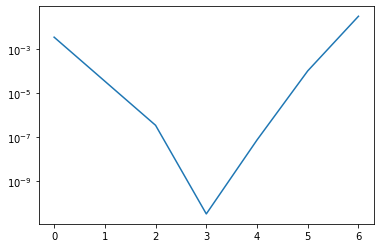

In [14]:
from scipy.misc import derivative

def f(x):
    return -0.1*x**4 - 0.15*x**3 - 0.5*x**2 - 0.25*x + 1.2

x0 = 0.5
dx = 1e-1
real = -0.9125 # valor real da derivada em x = 0.5
erro = []
for dx in [1e-1, 1e-2, 1e-3, 1e-5, 1e-10, 1e-13, 1e-15]:
    df = derivative(f, x0, dx)
    erro.append(abs(df - real))
    print(f'Valor estimado: {df} erro: {abs(df-real)}')
    
import matplotlib.pyplot as plt

plt.semilogy(erro)

# Série de Taylor

A expansão em série de Taylor de uma função em $f(x+h)$ é dada por:

\begin{equation} \label{eq:taylorprogressiva}
f(x+h) = f(x) + hf'(x) + \dfrac{h^2}{2}f''(x) + \ldots
\end{equation}

Reorganizando os termos, obtemos uma fórmula para a derivada:

\begin{equation} 
\dfrac{f(x+h) - f(x)}{h} = f'(x) + \dfrac{h}{2}f''(x) + \ldots
\end{equation}

que nos diz que:

\begin{equation} 
f'(x) = \dfrac{f(x+h) - f(x)}{h} + O(h)
\end{equation}

onde $O(h)$ nos diz que o erro cometido é da ordem (proporcional) de $h$.

Esta fórmula é conhecida como **derivada por diferença progressiva**.

In [22]:
def f(x):
    return -0.1*x**4 - 0.15*x**3 - 0.5*x**2 - 0.25*x + 1.2

def derivada_progressiva(f, x0, h):
    df = (f(x0 + h) - f(x0))/h
    return df

x0 = 0.5
h = 1e-5
real = -0.9125 # valor real da derivada em x = 0.5

df = derivada_progressiva(f, x0, h)
print(f'Valor estimado: {df} erro: {df-real}')

Valor estimado: -0.9125087500283512 erro: -8.75002835121208e-06


## Derivada por diferença regressiva

Também é possível aproximar a derivada utilizando o ponto $x - h$:

\begin{equation} \label{eq:taylorregressiva}
f(x - h) = f(x) - hf'(x) + \dfrac{h^2}{2}f''(x) + \ldots
\end{equation}

Neste caso, ela é chamada derivada por diferença regressiva:

\begin{equation}
f'(x) \cong \dfrac{f(x) - f(x - h)}{h}
\end{equation}

In [30]:
def f(x):
    return -0.1*x**4 - 0.15*x**3 - 0.5*x**2 - 0.25*x + 1.2

def derivada_regressiva(f, x0, h):
    df = (f(x0) - f(x0 - h))/h
    return df

x0 = 0.5
h = 1e-5
real = -0.9125 # valor real da derivada em x = 0.5

df = derivada_regressiva(f, x0, h)
print(f'Valor estimado: {df} erro: {df-real}')

Valor estimado: -0.9124912500380055 erro: 8.749961994514166e-06


## Derivada por diferença centrada

Por último, podemos subtrair a equação \ref{eq:taylorregressiva} da eq. \ref{eq:taylorprogressiva} e obter:

\begin{equation} 
f(x + h) - f(x - h) = 0 + 2hf'(x)  + 2\dfrac{h^3}{6}f'''(x) + \ldots
\end{equation}

o que, após agruparmos os termos nos dá:

\begin{equation}
f'(x) = \dfrac{f(x + h) - f(x - h)}{2h} + O(h^2)  
\end{equation}

Neste caso, ela é chamada derivada por diferença centrada:

\begin{equation}
f'(x) \cong \dfrac{f(x + h) - f(x - h)}{2h}
\end{equation}

Observe que o erro cometido nesta formulação é da ordem de $O(h^2)$ enquanto que nas anteriores é de $O(h)$.
Ou seja, ao diminuirmos o valor de $h$, na diferença progressiva ou regressiva, o erro irá diminuir proporcionalmente, enquanto que na diferença centrada o erro irá diminuir de forma quadrática.

In [27]:
def f(x):
    return -0.1*x**4 - 0.15*x**3 - 0.5*x**2 - 0.25*x + 1.2

def derivada_centrada(f, x0, h):
    df = (f(x0 + h) - f(x0 - h))/(2*h)
    return df

x0 = 0.5
h = 1e-5
real = -0.9125 # valor real da derivada em x = 0.5

df = derivada_centrada(f, x0, h)
print(f'Valor estimado: {df} erro: {df-real}')

Valor estimado: -0.9125000000331783 erro: -3.317834895710803e-11


# Exemplo 2:

Calcule a **derivada segunda** da função

\begin{equation}
f(x) = -0.1x^4 - 0.15x^3 -0.5x^2 -0.25x + 1.2
\end{equation}

em $x = 0.5$

## Solução analítica

A solução analítica é dada por:

\begin{equation}
f''(x) = -1.2x^2 - 0.9x -1.0
\end{equation}

ou seja:

\begin{equation}
f''(0.5) = -1.75
\end{equation}


In [39]:
from scipy.misc import derivative

def f(x):
    return -0.1*x**4 - 0.15*x**3 - 0.5*x**2 - 0.25*x + 1.2

x0 = 0.5
dx = 1e-4

derivative(f, x0, dx, n=2)

-1.750000000466656

# Derivada de ordem superior

A série de Taylor pode ser utilizada também para gerar aproximações das derivadas de ordem superior.

Considere as expansões abaixo:

\begin{equation} \label{eq:taylor1}
f(x+2h) = f(x) + 2hf'(x) + \dfrac{(2h)^2}{2}f''(x) + \ldots
\end{equation}

e

\begin{equation} \label{eq:taylor2}
f(x+h) = f(x) + hf'(x) + \dfrac{h^2}{2}f''(x) + \ldots
\end{equation}

Tomando o dobro da equação \ref{eq:taylor2} e subtraindo da equação \ref{eq:taylor1} temos:

\begin{equation} 
f(x + 2h) - 2f(x + h) = -f(x) + 0 + h^2f''(x) + \ldots
\end{equation}

o que nos leva à fórmula:

\begin{equation} \label{eq:derivadasegundaprogressiva}
f''(x) = \dfrac{ f(x + 2h) - 2f(x - h) + f(x)}{h^2} + O(h)
\end{equation}

conhecida como segunda diferença dividida finita progressiva.

A versão regressiva é dada por:

\begin{equation} 
f''(x) = \dfrac{ f(x) - 2f(x - h) + f(x - 2h)}{h^2}
\end{equation}

com erro da ordem de $O(h)$, e a versão centrada é dada por:


\begin{equation} \label{eq:derivadasegunda}
f''(x) = \dfrac{ f(x + h) - 2f(x) + f(x - h)}{h^2}
\end{equation}
com erro da ordem de $O(h^2)$



In [41]:
def f(x):
    return -0.1*x**4 - 0.15*x**3 - 0.5*x**2 - 0.25*x + 1.2

def derivada_segunda_centrada(f, x0, h):
    df = (f(x0 + h) - 2*f(x0) + f(x0 - h))/(h**2)
    return df

x0 = 0.5
h = 1e-4
real = -1.75 # valor real da derivada em x = 0.5

df = derivada_segunda_centrada(f, x0, h)
print(f'Valor estimado: {df} erro: {df-real}')

Valor estimado: -1.750000000466656 erro: -4.666560471378034e-10


# Derivadas de alta acurácia

Se substituirmos a fórmula da derivada segunda (eq. \ref{eq:derivadasegundaprogressiva}) na série de Taylor (\ref{eq:taylorprogressiva}), podemos obter uma forma mais precisa:

\begin{equation}
f'(x) = \dfrac{-f(x+2h) + 4f(x+h) -3f(x)}{2h} + O(h^2)
\end{equation}

Observe que o ganho de precisão exige um número maior de operações.

In [4]:
def f(x):
    return -0.1*x**4 - 0.15*x**3 - 0.5*x**2 - 0.25*x + 1.2

def derivada_progressiva(f, x0, h):
    df = (f(x0 + h) - f(x0))/h
    return df

def derivada_centrada(f, x0, h):
    df = (f(x0 + h) - f(x0 - h))/(2*h)
    return df

def derivada_altaacuracia(f, x0, h):
    df = (-f(x0 + 2*h) + 4*f(x0+h) -3*f(x0))/(2*h)
    return df

x0 = 0.5
h = 1e-5
real = -0.9125 # valor real da derivada em x = 0.5

df = derivada_progressiva(f, x0, h)
print(f'Valor estimado: {df} erro: {df-real}')

df = derivada_centrada(f, x0, h)
print(f'Valor estimado: {df} erro: {df-real}')

df = derivada_altaacuracia(f, x0, h)
print(f'Valor estimado: {df} erro: {df-real}')

df = derivative(f, x0, h)
print(f'Valor estimado: {df} erro: {df-real}')

Valor estimado: -0.9125087500283512 erro: -8.75002835121208e-06
Valor estimado: -0.9125000000331783 erro: -3.317834895710803e-11
Valor estimado: -0.9124999999166049 erro: 8.339506862853341e-11
Valor estimado: -0.9125000000331783 erro: -3.317834895710803e-11
